<a href="https://colab.research.google.com/github/HemaKumar0077/Autism-Detection-by-image/blob/main/Autism_original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Install Dependencies and Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import os as os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

2. Remove Unwanted images

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = '/content/drive/MyDrive/AutismDataset/data'

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [ ]:
os.listdir(data_dir)

['Non_Autistic', 'Autistic']

# 3. Load **Data**

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/AutismDataset/data')

Found 2940 files belonging to 2 classes.


In [ ]:
tf.keras.utils.image_dataset_from_directory??

In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
#batch[1]

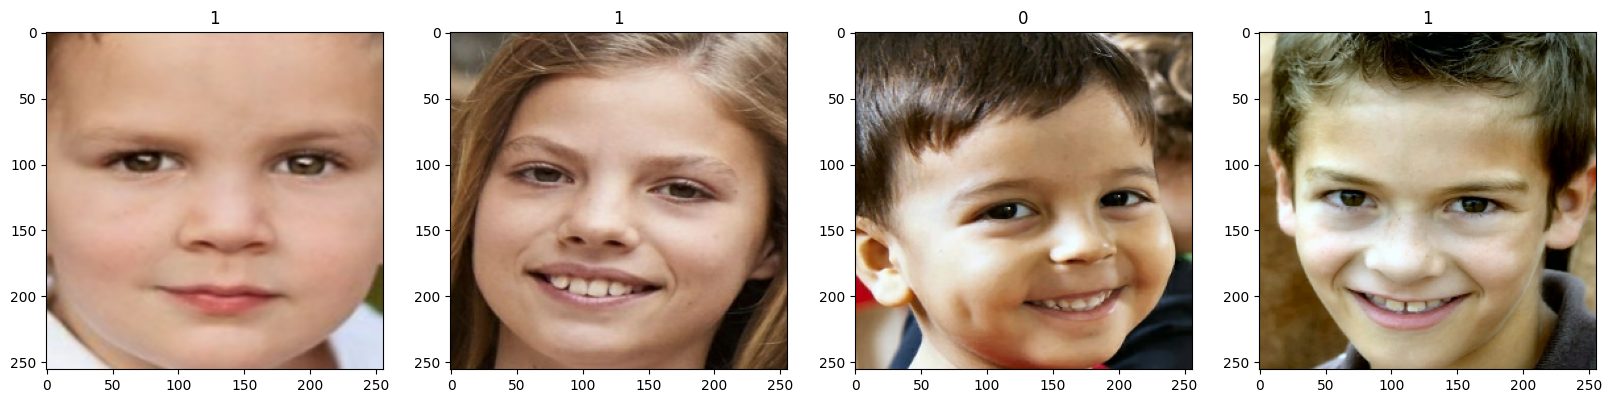

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

4. Scale Data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[4.18711692e-01, 4.21400130e-01, 4.51876521e-01],
          [4.19031054e-01, 4.30795759e-01, 4.58246738e-01],
          [4.15525436e-01, 4.34015006e-01, 4.56985295e-01],
          ...,
          [1.57023594e-01, 1.68788299e-01, 1.41337320e-01],
          [1.44964874e-01, 1.56729579e-01, 1.29278600e-01],
          [1.34448260e-01, 1.46212965e-01, 1.18761979e-01]],
 
         [[4.19368058e-01, 4.22056496e-01, 4.52532887e-01],
          [4.23935354e-01, 4.35700059e-01, 4.63151038e-01],
          [4.23824549e-01, 4.42314118e-01, 4.65284407e-01],
          ...,
          [1.53649911e-01, 1.65414616e-01, 1.37963638e-01],
          [1.45833939e-01, 1.57598659e-01, 1.30147666e-01],
          [1.37341499e-01, 1.49106205e-01, 1.21655226e-01]],
 
         [[4.21171725e-01, 4.23860133e-01, 4.56067562e-01],
          [4.32188034e-01, 4.43952739e-01, 4.73134726e-01],
          [4.30560648e-01, 4.49050248e-01, 4.73138779e-01],
          ...,
          [1.56986147e-01, 1.67019844e-01, 1.3870

In [ ]:
batch[0].max()

255.0

In [ ]:
len(data)

92

5. Split Data

In [ ]:
train_size = int(len(data)*.75)+1
val_size = int(len(data)*.15)
test_size = int(len(data)*.1)

In [ ]:
train_size+val_size+test_size

92

In [ ]:
train_size

70

In [ ]:
val_size

13

In [ ]:
test_size

9

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

#6. Build Deep Learning Model

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Create a Sequential model
model = Sequential()

model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Adding Dropout for regularization
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Load your training and validation data using train_datagen

# Set up callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model




In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 127, 127, 16)     64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                        

7. Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
history = model.fit(
    train,
    epochs=50,
    validation_data=val,
    callbacks=[early_stop, reduce_lr])

Epoch 1/50
70/70 [==============================] - 35s 272ms/step - loss: 0.6711 - accuracy: 0.6911 - val_loss: 1.2640 - val_accuracy: 0.4832 - lr: 0.0010
Epoch 2/50
70/70 [==============================] - 20s 277ms/step - loss: 0.5005 - accuracy: 0.7598 - val_loss: 2.0523 - val_accuracy: 0.4832 - lr: 0.0010
Epoch 3/50
70/70 [==============================] - 18s 252ms/step - loss: 0.4002 - accuracy: 0.8188 - val_loss: 1.6836 - val_accuracy: 0.4952 - lr: 0.0010
Epoch 4/50
70/70 [==============================] - 20s 273ms/step - loss: 0.3325 - accuracy: 0.8562 - val_loss: 2.0744 - val_accuracy: 0.4808 - lr: 0.0010
Epoch 5/50
70/70 [==============================] - 17s 231ms/step - loss: 0.2431 - accuracy: 0.9040 - val_loss: 1.4434 - val_accuracy: 0.5096 - lr: 2.0000e-04
Epoch 6/50
70/70 [==============================] - 21s 291ms/step - loss: 0.2056 - accuracy: 0.9277 - val_loss: 1.1015 - val_accuracy: 0.5433 - lr: 2.0000e-04
Epoch 7/50
70/70 [==============================] - 17s 

8. Plot Performance

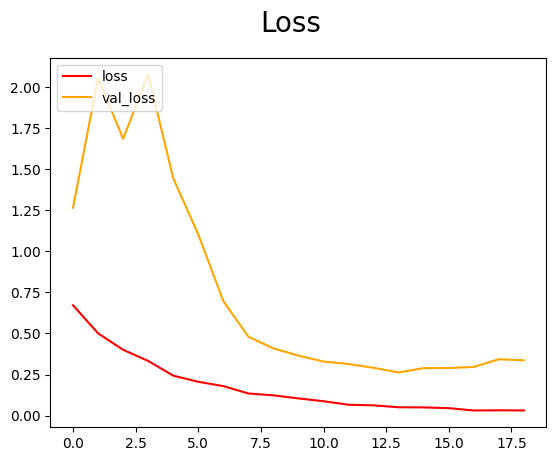

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='red', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

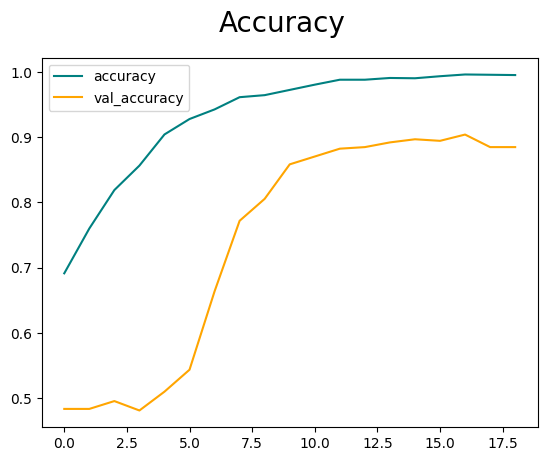

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    z = model.predict(X)
    pre.update_state(y, z)
    re.update_state(y, z)
    acc.update_state(y, z)

1/1 [==============================] - 1s 542ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.8108108, shape=(), dtype=float32) tf.Tensor(0.88235295, shape=(), dtype=float32) tf.Tensor(0.8450704, shape=(), dtype=float32)


10. Test

In [ ]:
import cv2 as cv2

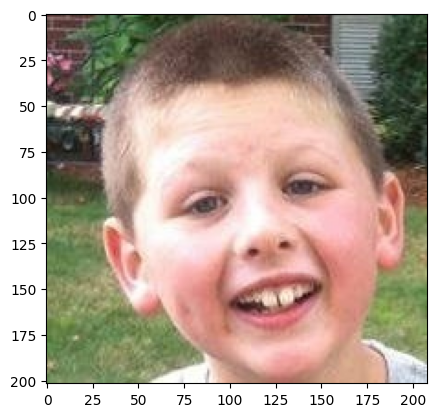

In [ ]:
img = cv2.imread('/content/drive/MyDrive/AutismDataset/test/Autistic.134.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

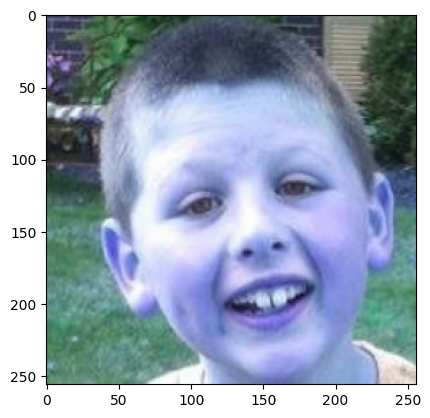

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
z= model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 137ms/step


In [ ]:
z

array([[0.00015639]], dtype=float32)

In [ ]:
if z > 0.015:
    print(f'Predicted photo is Not Autistic')
else:
    print(f'Predicted photo is Autistic')

Predicted photo is Autistic


*5.Saving the model*

In [ ]:
tf.keras.models.save_model(model,'my_model2.hdf5')